# Predicting the sale price of Bulldozers using machine learning 💻

In this notebook, we are going through an example machine learning project in attempt to predict the sale price of bulldozers. 

## 1. Problem definition

The following is taken from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/description

The goal of the contest is to **predict the sale price** of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction.

> "How well can we predict the future sale price of a bulldozer through using its charateristics and historical data."

## 2. Data
The following is taken from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

**The data for this competition is split into three parts:**

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


**The key fields are in train.csv are:**
* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  

Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

## 3. Evaluation

The following is taken from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

* Have a header: "SalesID,SalePrice"
* Contain two columns
    * SalesID: SalesID for the validation set in sorted order
    * SalePrice: Your predicted price of the sale

**Note:** The goal for most regression projects are to minimize the error. For example, our goal in this project is to build a machine learning model that minimises the RMSLE (root mean squared log error).

## 4. Features

Kaggle provides a data dictionary detailing the features of the dataset (filename = Data Dictionary.xlsx) via https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
# Import the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import training and validation data sets 
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False)

In [3]:
# View general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Seems like there are some null values (NaN), calculate how many per feature
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
# View the first few rows of the data
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


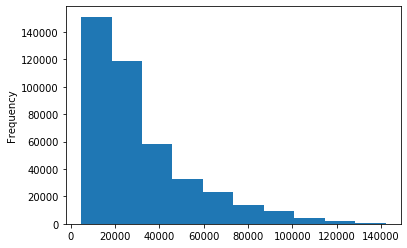

In [6]:
# Clearly, 'SalePrice' will be important so let's view the spread of the data
df["SalePrice"].plot.hist();

### Data cleansing and manipulation

**Parsing dates**

When working with time-series data, we want to enrich the time & date components as much as possible. We can do this by telling pandas which of our features has dates, using the `parse_dates` parameter.

In [7]:
# The 'saledate' feature is in an object type, let's change this to a more usable to data type and format
df["saledate"].dtype

dtype('O')

In [8]:
# Import the data again, this time using the `parse_dates` parameter
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])
df["saledate"].dtype

dtype('<M8[ns]')

In [9]:
# Confirm that the dtype has changed from 'object' to 'datetime64' and view the first few entries
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

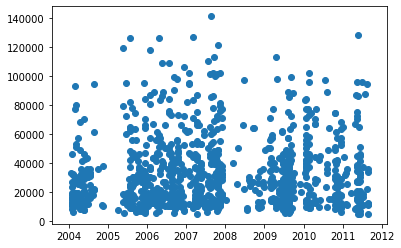

In [10]:
# View a scatter of the first 1000 entries of 'SalePrice' and 'saledate'
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [11]:
# Review the data to determine the next steps (Transpose to avoid truncation of columns)
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


**Sorting dates**

When working with time-series data, it's generally a good idea to sort it by date

In [12]:
# Sort DataFrame by date order
df.sort_values(by=["saledate"],
               inplace=True,
               ascending=True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

**Make a copy of the DataFrame**

It's generally a good idea to make a copy of the DataFrame, before doing heavy data manipulation.

In [13]:
# Make a copy of the DataFrame
df_tmp = df.copy()
df_tmp.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


**Convert string to categories**

Ensure that the data is of similar categories - e.g. we can't fit a regression model on string data. One way to turn objects into numbers, is to convert them into pandas categories. We can use pandas api types to checj the dtype.

In [14]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [15]:
# Find the columns that contain strings and covert them to pandas categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [16]:
# Confirm the conversion into categories
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

**Impute missing numeric values**

It is a good idea to handle missing values before fitting a machine learning model. Use common sense to either remove null columns/rows OR replace null with sensible values - e.g. mean average (if normal distribution) or median values (if there are outlier).

In [17]:
# Let's see the % of missing values per feature
df_tmp.isna().sum()/len(df_tmp) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

In [18]:
# Find the columns that contain missing numeric values, and fill with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column to indicate content was null
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing values with median
            df_tmp[label] = content.fillna(content.median())

In [19]:
# Confirm that there are no missing numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) # Should produce no output

**Impute missing categorical values**

It is a good idea to handle missing values before fitting a machine learning model. Use common sense to either remove null columns/rows OR convert into categories.

In [20]:
# Find the columns that contain missing categorical values, and convert into categories
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column to indicate content was null
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Turn the categories into numbers and + 1
            df_tmp[label] = pd.Categorical(content).codes+1

In [21]:
# Confirm that there are no missing numeric values
for label, content in df_tmp.items():
    if pd.isnull(content).sum():
        print(label) # Should produce no outputs

**Covert any other non-numerical values into numerical values**

In [23]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 100 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   SalesID                              412698 non-null  int64  
 1   SalePrice                            412698 non-null  float64
 2   MachineID                            412698 non-null  int64  
 3   ModelID                              412698 non-null  int64  
 4   datasource                           412698 non-null  int64  
 5   auctioneerID                         412698 non-null  float64
 6   YearMade                             412698 non-null  int64  
 7   MachineHoursCurrentMeter             412698 non-null  float64
 8   UsageBand                            412698 non-null  int8   
 9   saledate                             412698 non-null  int16  
 10  fiModelDesc                          412698 non-null  int16  
 11  fiBaseM

### Feature engineering

**Add datetime parameters for `saledate` column**

In [25]:
# Add 'saleYear' to df_tmp
df_tmp["saleYear"] = df.saledate.dt.year

# Add 'saleMonth' to df_tmp
df_tmp["saleMonth"] = df.saledate.dt.month

# Add 'saleDay' to df_tmp
df_tmp["saleDay"] = df.saledate.dt.day

# Add 'saleDayOfWeek' to df_tmp
df_tmp["saleDayOfWeek"] = df.saledate.dt.dayofweek

# Add 'saleDayOfWeek' to df_tmp
df_tmp["saleDayOfWeek"] = df.saledate.dt.dayofweek

# Add 'saleDayOfYear' to df_tmp
df_tmp["saleDayOfYear"] = df.saledate.dt.dayofyear

# Now we can remove the 'saledate'
df_tmp.drop("saledate", axis=1, inplace=True)

# Let's review the df_tmp DataFrame
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
saleYear,1989,1989,1989,1989,1989
saleMonth,1,1,1,1,1
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1


### Save preprocessed data

In [26]:
# Export current tmp DataFrame to csv
df_tmp.to_csv("data\TrainAndValid_tmp.csv", 
              index=False)

## 5. Modelling

Now that all missing values are imputed and all non-numerical values are converted into numerical, we can start modelling.

**Random Forest Regression**

In [27]:
%%time

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model to the training data
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

KeyboardInterrupt: 

In [73]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.987551349795339

**Splitting data into training, validation and test sets**

In [28]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [29]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [30]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

**Building an evaluation function**

The competition evaluates on root mean squared log error (RMSLE) which is not included in sklearn metrics, so we'll built it.

In [31]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates the root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different functions
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_valid, val_preds),
              "Training RMSLE" : rmsle(y_train, train_preds),
              "Valid RMSLE" : rmsle(y_valid, val_preds),
              "Training R2" : r2_score(y_train, train_preds),
              "Valid R2" : r2_score(y_valid, val_preds)}
    return scores

**Modelling on a subset of data (to tune hyperparameters)**

Retraining an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

If you're experiments are taking longer than 10-seconds (give or take how long you have to wait), you should be trying to speed things up. You can speed things up by sampling less data or using a faster computer.

In [32]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [33]:
%%time

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

Wall time: 19.9 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
show_scores(model)

{'Training MAE': 5556.193568289186,
 'Valid MAE': 7123.756625766871,
 'Training RMSLE': 0.2578098591336077,
 'Valid RMSLE': 0.2917315693200684,
 'Training R2': 0.8612951207424241,
 'Valid R2': 0.835404279150179}

**Hyperparameter tuning with RandomizedSearchCV**

In [35]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(2, 20, 2),
           "max_features" : [0.5, 1, 'sqrt', 'auto'],
           "max_samples" : [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished


Wall time: 1min 30s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [36]:
# Find the best hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 14,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [37]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 6475.772721034386,
 'Valid MAE': 8211.581637685002,
 'Training RMSLE': 0.29085958138293294,
 'Valid RMSLE': 0.324899753814469,
 'Training R2': 0.8108315758655318,
 'Valid R2': 0.7728737248038271}

**Ideal model**

These were achieved after 100 iterations of `RandomizedSearchCV`.

In [82]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
# Fit the model
ideal_model.fit(X_train, y_train)

Wall time: 1min 52s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [83]:
show_scores(ideal_model)

{'Training MAE': 2958.43241824023,
 'Valid MAE': 5960.761527163479,
 'Training RMSLE': 0.14485011582340335,
 'Valid RMSLE': 0.2464754030494482,
 'Training R2': 0.9587076120097595,
 'Valid R2': 0.8821380269396109}

### Make predictions on test data

In [67]:
# Import test data
df_test = pd.read_csv("data/Test.csv",
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


**Preprocessing data**

In [68]:
# Make necessary data manipulations, conversions and impute missing values

def preprocess_data(df):
    """
    Performs necessary data manipulations, conversions and impute missing values
    """
    
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [69]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [72]:
# Find how the df and df_test columns differs using sets
set(X_train.columns) - set(df_test.columns)

{'saledate_is_missing'}

In [75]:
# Add the missing column to df_test
df_test["auctioneerID_is_missing"] = False
df_test["saledate_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing,saledate_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,False,False,False,True,True,False,False


**Finally, make predictions on the test data**

In [84]:
test_preds = ideal_model.predict(df_test)

In [85]:
len(test_preds)

12457

We've made some predictions but it is not yet in the format that Kaggle requires: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [86]:
# Format predictions as required by Kaggle
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,39097.970765
1,1227844,22781.394401
2,1227847,75120.211042
3,1227848,76786.456685
4,1227863,60089.301403
...,...,...
12452,6643171,52749.867436
12453,6643173,22349.387590
12454,6643184,18336.402799
12455,6643186,28597.556883


In [80]:
# Export prediction data into csv
df_preds.to_csv("data/test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to determines which features were most important to predict the **target variable** (SalePrice)

In [87]:
# Find the feature importance of the best model
ideal_model.feature_importances_

array([3.43262413e-02, 1.93410573e-02, 4.10466059e-02, 1.67117311e-03,
       3.32294932e-03, 2.05287987e-01, 3.13483955e-03, 1.07484066e-03,
       3.97470941e-02, 4.13877383e-02, 6.96779489e-02, 4.67645264e-03,
       1.74349832e-02, 1.65646969e-01, 4.01127418e-02, 5.92927239e-03,
       3.34841102e-03, 2.40632009e-03, 3.34088390e-03, 6.53755377e-02,
       4.62698022e-04, 3.90603801e-05, 1.12049423e-03, 1.99548354e-04,
       1.30179030e-03, 2.21629734e-05, 2.02861469e-03, 8.28711773e-03,
       1.21937303e-03, 1.55336002e-04, 3.14566507e-03, 6.01392757e-03,
       3.05435640e-03, 1.19398363e-03, 2.59656809e-03, 1.15710951e-02,
       1.03167789e-03, 1.24524686e-02, 1.57610689e-03, 8.84777746e-04,
       1.41160715e-03, 7.53631838e-04, 9.28916289e-04, 5.70499083e-04,
       3.65498633e-04, 3.38475584e-04, 3.44629320e-04, 1.69530654e-03,
       1.22516169e-03, 2.00902021e-04, 4.79192422e-04, 2.59174680e-04,
       1.41954464e-03, 2.97070925e-04, 2.41291838e-03, 1.13873214e-03,
      

In [90]:
# Create a function to visual the top n features
def plot_features(columns, importances, n=20):
    """
    Plots the top n features and their corresponding importance-values. Takes 'columns', 'importances' and 'n'(number of features to plot: default=20)
    """
    df2 = (pd.DataFrame({"features" : columns,
                         "feature_importances" : importances})
              .sort_values("feature_importances", ascending=False)
              .reset_index(drop=True))
    # Plot the created dataframe
    fig, ax = plt.subplots()
    ax.barh(df2["features"][:n], df2["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

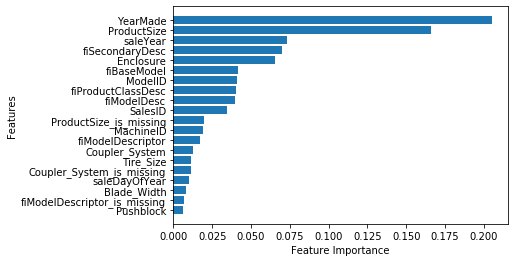

In [91]:
plot_features(X_train.columns, ideal_model.feature_importances_)